<h1>Gaussian Elimination</h1>

<p>The solving of $Ax=b$ is typically taught first by using Gaussian Elimination. Rather than find $LU$ and then solve, we reduce the augmented matrix $[A | b]$ to an upper triangular form and then back substitute.</p>

<p>Let's see that we get $U$ and $L$ from this familar process:</p>

<h2>Example</h2>

<p>Following the text, let</p>

In [ ]:
A = [6 -2 -2 4; 12 -8 6 10; 3 -13 9 3; -6 4 1 -18]

4×4 Array{Int64,2}:
  6   -2  -2    4
 12   -8   6   10
  3  -13   9    3
 -6    4   1  -18

<p>and</p>

In [ ]:
b = [12, 34, 27, -38]

4-element Array{Int64,1}:
  12
  34
  27
 -38

<p>Then we form the augmented matrix, <code>M</code>:</p>

In [ ]:
M = [A b//1]

4×5 Array{Rational{Int64},2}:
  6//1   -2//1  -2//1    4//1   12//1
 12//1   -8//1   6//1   10//1   34//1
  3//1  -13//1   9//1    3//1   27//1
 -6//1    4//1   1//1  -18//1  -38//1

<p>We want to subtract the first row times a factor from the each of the next three rows:</p>

In [ ]:
M[2,:] = M[2,:] - 2*M[1,:]
M[3,:] = M[3,:] - 1//2*M[1,:]
M[4,:] = M[4,:] + 1*M[1,:]
M

4×5 Array{Rational{Int64},2}:
 6//1   -2//1  -2//1    4//1   12//1
 0//1   -4//1  10//1    2//1   10//1
 0//1  -12//1  10//1    1//1   21//1
 0//1    2//1  -1//1  -14//1  -26//1

<p>Then we look at the second row. We use that $M_{22}$ value to "knock out" those below it:</p>

In [ ]:
M[3,:] = M[3,:] - 3*M[2,:]
M[4,:] = M[4,:] + 1//2 * M[2,:]
M

4×5 Array{Rational{Int64},2}:
 6//1  -2//1   -2//1    4//1   12//1
 0//1  -4//1   10//1    2//1   10//1
 0//1   0//1  -20//1   -5//1   -9//1
 0//1   0//1    4//1  -13//1  -21//1

<p>Finally, we use the third row to knock out the 4th:</p>

In [ ]:
M[4,:] += 1//5*M[3,:]  # alternate syntax

5-element Array{Rational{Int64},1}:
    0//1
    0//1
    0//1
  -14//1
 -114//5

<p>We have $U$ sitting in this:</p>

In [ ]:
U = M[:, 1:4]

4×4 Array{Rational{Int64},2}:
 6//1  -2//1   -2//1    4//1
 0//1  -4//1   10//1    2//1
 0//1   0//1  -20//1   -5//1
 0//1   0//1    0//1  -14//1

<p>And what about $L$? Form the matrix with the products:</p>

In [ ]:
L = [1 0 0 0;  2 1 0 0; 1//2 3 1 0; -1 -1//2 -1//5 1]

4×4 Array{Rational{Int64},2}:
  1//1   0//1   0//1  0//1
  2//1   1//1   0//1  0//1
  1//2   3//1   1//1  0//1
 -1//1  -1//2  -1//5  1//1

<p>We verify the product:</p>

In [ ]:
A - L*U

4×4 Array{Rational{Int64},2}:
 0//1  0//1  0//1  0//1
 0//1  0//1  0//1  0//1
 0//1  0//1  0//1  0//1
 0//1  0//1  0//1  0//1

<h3>Where did $L$ come from?</h3>

<p>We have the operations of adding $\lambda$ to the $i$th row and adding to the $j$th row where $j > i$. Call these $R_m$. And then we have:</p>


$$
\begin{align}
[U~ b'] &= R_n R_{n-1} \cdots R_2 R_1 [A~ b]\\
(R_n R_{n-1} \cdots R_2 R_1)^{-1} [ U ~ b'] &= [A ~ b] \\
[LU ~ Lb'] &= [A ~ b]
\end{align}
$$


<p>And we have $LU = A$. Is $L$ actually lower diagonal?</p>

<p>The $R_m$ matrices look like $I + \lambda \delta^{ij}$. The inverses for these are $I - \lambda \delta^{ij}$:</p>


$$
(I + \lambda \delta^{ij}) \cdot (I - \lambda \delta^{ij}) =
I^2 + \lambda \delta^{ij}- \lambda \delta^{ij} - \lambda^2 \delta^{ij} = I.
$$


<p>(The $lk$ term of $\delta^{ij} \cdot \delta^{ij}$ is $\sum_m \delta^{ij}(lm) \cdot \delta^{ij}(mn)$. The first means $m=j$, the second means $m=i$, so this is $0$ unless $i=j$, but $i < j$.)</p>

<p>So the inverses are lower triangular.</p>

<p>Finally, $R_p R_m = (I + \lambda \delta^{ij})(I + \gamma \delta^{kl}) = I +  \lambda \delta^{ij} + \gamma \delta^{kl}$ which is lower triangular, so the product of the inverses will be.</p>

<p>Thus $L$ is unit lower triangular, as the diagonal is all 1.</p>

<h2>Pivoting</h2>

<p>The book points out that these two problems are similar mathematically, but not computationally:</p>


$$
A = \left[\begin{array}{cc}
\epsilon & 1\\
1 & 1
\end{array}\right]
$$


<p>and</p>


$$
B = \left[\begin{array}{cc}
1 & 1\\
\epsilon & 1
\end{array}\right]
$$


<p>Solving $Ax=[1, 2]$ we get</p>


$$
\begin{align}
\epsilon\cdot x_1 + 1\cdot x_2 &= 1\\
0 \cdot x_1 + (1 - \epsilon^{-1}) x_2 &= 2 - \epsilon^{-1}
\end{align}
$$


<p>So,</p>


$$
\begin{align}
x_2 &= \frac{2 - \epsilon^{-1}}{1 - \epsilon^{-1}} \approx 1\\
x_1 &= \epsilon^{-1} [ 1 - \frac{2-\epsilon^{-1}}{1-\epsilon^{-1}}]
\end{align}
$$


<p>If $\epsilon$ is small, then $1/\epsilon$ is big and subtracting from 1 or 2 can be an issue. (e.g., we saw <code>10^30 -1 &#61; 10^30</code> on the computer. So, in the computation of $x_1$, we might get $1/\epsilon [1 - 1] = 0$. But, in fact, this is $ -\epsilon^{-1}/(1-\epsilon^{-1}) \approx 1$.</p>

<p>Whereas, with $Bx = [2; 1]$, we get </p>


$$
\begin{align}
1\cdot x_1 + 1\cdot x_2 &= 2\\
0 \cdot x_1 + (1 - \epsilon) x_2 &= 2 - \epsilon
\end{align}
$$


<p>So, $x_2 = (1-2\epsilon)/(1 - \epsilon) \approx 1$ and $x_1 = 2 - x_2 \approx 2 - 1 = 1$, as desired.</p>

<p>So, switching rows can make a <em>big</em> difference in the output when dealing with floating point.</p>

<p>(We don't really switch, but rather keep track of which row is used to pivot using a permutation. Moving data in a matrix is costly, much more so than keeping track of indices.)</p>

<h3>Pivoting strategies</h3>

<p>Pivoting results in  permutation of the rows of $A$. This can be written different ways. If $P$ is a permutation matrix, then we can write $LU = PA$ as a $LU$ factorization. Whereas, if <code>p</code> is a permutation vector, we can use the matrix notation of <code>julia</code> to write <code>L*U &#61; A&#91;p,:&#93;</code>.</p>

<p>There are different ways that pivot rows can be selected:</p>

<ul>
<li><p><strong>partial pivoting</strong>: at step $i$ choose the row with the largest value of $|a_{li|}$, where $l$ runs over the rows that have <em>not</em> been used to pivot. </p>
</li>
<li><p><strong>complete pivoting</strong> consider the largest of all  values in rows not used for pivoting</p>
</li>
<li><p><strong>scaled row pivoting</strong>. Defining the scale of a row by:</p>
</li>
</ul>


$$
s_i = max_{i \leq j \leq n} |a_{ij}| = \text{largest of } |a_{i1}|, |a_{i2}|, \dots, |a_{in}|.
$$


<p>Then at step $i$, form the ratios: $|a_{li}/s_l|$, for $l$ running over the rows not already used for pivoting. Choose the $l$ with the largest ratio to be the new pivot row.</p>

<h3>Example</h3>

<p>Consider the matrix</p>

In [ ]:
Aorig = [-1.0 1 -4; 2 3 1; 3 3 2]
A = copy(Aorig)

3×3 Array{Float64,2}:
 -1.0  1.0  -4.0
  2.0  3.0   1.0
  3.0  3.0   2.0

<p>We first do partial pivoting:</p>

<p>As $3$ is the largest value in the first column, we choose row 3 to pivot on, and eliminate the first entry in rows 1 and 2 by the appropriate multiplication. We store those values in a matrix $L$:</p>

In [ ]:
L = zeros(A) # copies size of A, fills with 0
i = 1
p = 3
ps = [p]
L[ps[end], i] = 1
for l in setdiff(1:3, ps)
   L[l, i] = A[l, i] / A[p, i]
   A[l, :] = A[l,:] - L[l,i]*A[p,:]
 end
A   

3×3 Array{Float64,2}:
 0.0  2.0  -3.33333 
 0.0  1.0  -0.333333
 3.0  3.0   2.0     

<p>We now have to consider the matrix without the third row:</p>

In [ ]:
A[setdiff(1:3, ps), :]

2×3 Array{Float64,2}:
 0.0  2.0  -3.33333 
 0.0  1.0  -0.333333

<p>We see that row 1 is the next pivot row, as $2$ is bigger that $1$ in absolute value</p>

In [ ]:
i = 2
p = 1
ps = push!(ps, p)
L[ps[end], i] = 1
for l in setdiff(1:3, ps)
   L[l, i] = A[l, i] / A[p, i]
   A[l, :] = A[l,:] - L[l,i]*A[p,:]
 end
A   

3×3 Array{Float64,2}:
 0.0  2.0  -3.33333
 0.0  0.0   1.33333
 3.0  3.0   2.0    

<p>We finish by pushing the last row, $2$ onto our permutation vector and making sure to set the diagonal entry to $1$:</p>

In [ ]:
i, p = 3, 2
push!(ps, p)
L[p,i] = 1

1

<p>Are we done? Our bookkeeping, <code>ps</code>, points to the pivot rows, to see $L$ and $U$ we need to reverse that:</p>

In [ ]:
L = L[ps, :]
U = A[ps, :]
L

3×3 Array{Float64,2}:
  1.0       0.0  0.0
 -0.333333  1.0  0.0
  0.666667  0.5  1.0

<p>and</p>

In [ ]:
U

3×3 Array{Float64,2}:
 3.0  3.0   2.0    
 0.0  2.0  -3.33333
 0.0  0.0   1.33333

<p>And we verify</p>

In [ ]:
L*U - Aorig[ps, :]

3×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

<p>To compare below, we record the 3 values computed:</p>

In [ ]:
L, U, ps

([1.0 0.0 0.0; -0.333333 1.0 0.0; 0.666667 0.5 1.0], [3.0 3.0 2.0; 0.0 2.0 -3.33333; 0.0 0.0 1.33333], [3, 1, 2])

<h3>Scaled row pivoting</h3>

<p>Now we repeat with scaled row pivoting:</p>

In [ ]:
A = copy(Aorig)

3×3 Array{Float64,2}:
 -1.0  1.0  -4.0
  2.0  3.0   1.0
  3.0  3.0   2.0

<p>We begin by finding the scale for each row:</p>

In [ ]:
s = mapslices(x->maximum(abs.(x)), A, 2) # mapslices does all rows at once

3×1 Array{Float64,2}:
 4.0
 3.0
 3.0

<p>Then we divide column 1 to find the largest:</p>

In [ ]:
i = 1
A[:,i] ./ s

3×1 Array{Float64,2}:
 -0.25    
  0.666667
  1.0     

<p>We see $p=3$ will work.</p>

In [ ]:
L = zeros(A)  
p=3
ps = [p]
L[p,i] = 1
for l in setdiff(1:3, ps)
  L[l,i]=  (A[l,i]/A[p,i])
  A[l,:] = A[l,:] - L[l,i]*A[p,:]
end
A

3×3 Array{Float64,2}:
 0.0  2.0  -3.33333 
 0.0  1.0  -0.333333
 3.0  3.0   2.0     

<p>Now we repeat, only we don't want to consider row 3, which we keep track of mentally and don't try to code.</p>

In [ ]:
i = 2
A[:,i]./ s

3×1 Array{Float64,2}:
 0.5     
 0.333333
 1.0     

<p>The answer is $p=1$ now. We  continue by subtracting a multiple of row 1 from row 2</p>

In [ ]:
p = 1
push!(ps, p)
L[p, i] = 1
L[2,i] = A[2,i] /A[p,i]
A[2,:] = A[2,:] - L[2,i] * A[p,:]
A

3×3 Array{Float64,2}:
 0.0  2.0  -3.33333
 0.0  0.0   1.33333
 3.0  3.0   2.0    

<p>So we have our permutation vector: $p = [3, 1, 2]$. Our matrix $U$ is then seen to be</p>

In [ ]:
push!(ps, 2)
L[2,3] = 1
U = A[ps,  :]

3×3 Array{Float64,2}:
 3.0  3.0   2.0    
 0.0  2.0  -3.33333
 0.0  0.0   1.33333

<p>Our matrix $L$ comes from using the  factors above (where we used minus signs):</p>

In [ ]:
L = L[ps, :]

3×3 Array{Float64,2}:
  1.0       0.0  0.0
 -0.333333  1.0  0.0
  0.666667  0.5  1.0

<p>Finally, we check that we got what we wanted: $LU$ is the permuted $A$:</p>

In [ ]:
L*U - Aorig[ps,:]

3×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

<p>For scaled pivoting we found:</p>

In [ ]:
L, U, ps

([1.0 0.0 0.0; -0.333333 1.0 0.0; 0.666667 0.5 1.0], [3.0 3.0 2.0; 0.0 2.0 -3.33333; 0.0 0.0 1.33333], [3, 1, 2])

<p>This ended up being the same as partial pivoting, as might be expected in some cases, but certainly not all, as the $LU$ factorization is not unique. What can be said is:</p>

<blockquote>
<p>Theorem 2, p173 With pivoting, there is a factorization $LU = PA$.</p>
</blockquote>

<h3>Compare to lu function</h3>

<p>Julia has a built in <code>lu</code> function to return the triple:</p>

In [ ]:
A = copy(Aorig)
lu(A)

([1.0 0.0 0.0; -0.333333 1.0 0.0; 0.666667 0.5 1.0], [3.0 3.0 2.0; 0.0 2.0 -3.33333; 0.0 0.0 1.33333], [3, 1, 2])

<p>This agrees with the factorization we found with partial pivoting. The empirical claim is that partial pivoting is nearly always better compared to complete pivoting due to the extra overhead required for complete pivoting.</p>

<p><a href="https://github.com/JuliaLang/julia/blob/master/base/linalg/lu.jl#L45">pivoting</a>  in Julia code.</p>

<h2>Counting steps</h2>

<p>Suppose $A$ is $n \times n$. If applicable, mathematicallly solving $Ax = b$ is as easy as writing $x = A^{-1} b$. Why bother with $LUx = b$ and then solving both $Ly=b$ and $Ux=y$? (Actually we take  $[A ~b]$ and find $[U ~ b']$ then solve this backsubstitution problem.)</p>

<p>One reason is it takes fewer steps.</p>

<p>The book argues that addition and subtraction are much cheaper to do than multiplication and division, so when counting operations, we should just count the long operations, <code>ops</code> or short.</p>

<p>Let's look at how many such operations are done for our pivoted Gaussian elimination. First the $U$ term.</p>

<p>For $i=1$, the first row is multiplied by some factor and $n-1$ times and subtracted from other rows. This is $n\cdot(n-1)$ steps, not counting the division to find the factor. For that, we have $n$ operations to find the pivot row (not counting the time to find a maximum, we did divide the $i$th column by the scale, hence $n$). So all told, we have basically $n(n-1) + n$ <code>ops</code>.</p>

<p>For $i=2$, we could repeat, but note that we are basically working with matrix without the $p$th row and the first column, so we have the same computation with an $(n-1) \times (n-1)$ size matrix. So the answer will be $n-1$ <code>ops</code>.</p>

<p>And so on, to where we get this elimination costs us this many <code>ops</code>:</p>


$$
n^2 + (n-1)^2 + \cdots + 2^2 = \sum_{i=1}^n i^2 -1 = \frac{n(n-1)(2n-1)}{6} -1 \approx \frac{n^3}{3} + \frac{n^2}{2}.
$$


<p>Now to count the steps to modify the $b$ to get $b'$. The first row introduces $n-1$, the second $n-2$, the third $n-3$ and so on, so this involves $\sum_{i=1}^{n-1} u$  or $n(n-1)/2$</p>

<p>To do the back substitution, we have $1$ division for the first row, $2$ <code>ops</code> for the second (we have $ax_j + bx_{j-1}=c$ and we solve for $x_j$ through $(1/a) \cdot (c - bx_{j-1})$ which is $2$ <code>ops</code>.) And so on to give: $ 1 +2 + \cdots +n$ or $(n+1)n/2$ counts.</p>

<p>All told we can put together to get a count. The book presents this a bit differently, for the case where we are solving $[A; b_1;b_2; \dots;b_m]$ simulataneously, and then we have:</p>

<blockquote>
<p>Theorem 4 (p176) on Long Operations: To solve $Ax=b$ using Gaussian elimination with scaled row pivoting for $m$ vectors $b$ where $A$ is $n\times n$ involves approximately this many <code>ops</code>:</p>
</blockquote>


$$
\frac{n^3}{3} + (\frac{1}{2} + m) n^2.
$$


<p>So, for a single $b$, to solve $Ax=b$ by this method is basically $n^3/3$ steps. Whereas to find the inverse itself (and not counting the steps in $A^{-1}b$, can be found by taking $m=n$ in the formula (reducing $[A;I]$). To give:</p>


$$
\text{steps to find } A^{-1} = \frac{n^3}{3} + (\frac{1}{2} + n) n^2 \approx \frac{n^3}{3} + n^3 = \frac{4}{3} n^3.
$$


<h2>Special case – Diagonally dominant matrices</h2>

<p>Call the matrix $A$ <em>diagonally dominant</em> if the diagonal terms are the largest in each row and column. (That is $|a_{ii}| \geq |a_{il}|, |a_{ki}|$).</p>

<blockquote>
<p>Thm: A diagonal dominant matrix is non-singular and has an LU factorization where no pivoting is necessary.</p>
</blockquote>

<p>This is a result of the fact that Gaussian elimination preserves the diagonal dominance, so picking a different partial pivot row or scaled pivot row is unecessary.</p>

<h2>tridiagonal system</h2>

<p>Consider the approximation formula for the second derivative:</p>


$$
f''(x) \approx \frac{f(x + h) - 2 f(x) + f(x-h)}{h^2}
$$


<p>If we took an interval, say $[0,1]$ and split into a grid of $n+1$ points, then we could discretize $f$ on these points. Using just these points, then we would approximate the second derivative at each point as above. Suppose we had values $f_i = f((i-1_/n)$ for $i = 1, 1, \dots n+1$. Then we could do many of these derivatives at once using matrix notation. To be speicific, we take $n=4$. Then we get</p>

In [ ]:
n=4
xs = linspace(0, 1, n)

0.0:0.3333333333333333:1.0

In [ ]:
f(x) = sin(x)
fs = f.(xs)

4-element Array{Float64,1}:
 0.0     
 0.327195
 0.61837 
 0.841471

In [ ]:
A =  [-2 1 0 0; 1 -2 1 0; 0 1 -2 1; 0 0 1 -2]

4×4 Array{Int64,2}:
 -2   1   0   0
  1  -2   1   0
  0   1  -2   1
  0   0   1  -2

<p>And then, we would have</p>

In [ ]:
h = (1-0)/n
(A * fs) / h^2 + fs

4-element Array{Float64,1}:
   5.23512 
  -0.249119
  -0.470813
 -16.1917  

<p>We see we don't have very good approximations to the second derivative. Were we to increase $n$ this could be the case, except on the edge cases:</p>

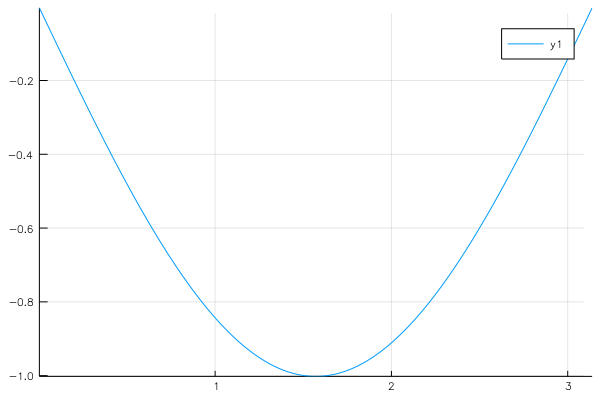

In [ ]:
n = 1000
a, b = 0, pi
h = (b - a) /n 

xs = linspace(a, b, n)
fs = f.(xs)

A = -2 * I + diagm(ones(n-1), 1) + diagm(ones(n-1), -1)  # I=identity,diagm=construct diagonal
out = (A * fs) / h^2

using Plots
plot(xs[2:end-1], out[2:end-1])

<p>And our error can be found from:</p>

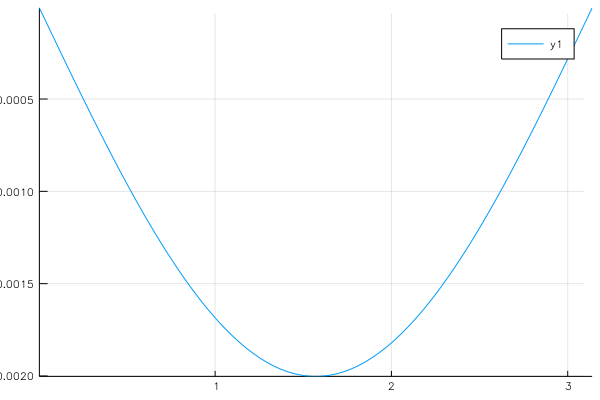

In [ ]:
out1 = out + fs  # -sin(x) + sin(x)
plot(xs[2:end-1], out1[2:end-1])

<p>But our focus here is on the special shape of $A$ – it is tridiagonal. that is $a_{ij} = 0$ if $|i-j| > 1$. For this system – which does not need pivoting – then the number of <code>ops</code> is dramatically reduced, as each row is done with $2$ <code>ops</code>, so to get the $LU$ factorization can be done quite quickly.</p>

<p>This is a good thing, as we see that large $n$s are needed to get accuracy, an if the algorithm scaled like $(1/3) \cdot n^3$ that would be a big problem.</p>